# Gathering Data

Import Required Modules

In [1]:
import pandas as pd
import wptools
import os
import json
import requests
import tweepy
from PIL import Image
from io import BytesIO

Create Data frame for 'twitter-archive-enhanced.csv'

In [2]:
twitter_archive_df = pd.read_csv('twitter-archive-enhanced.csv')

Create Data Frame for image_predictions

In [39]:
#create folder image_predictions using variable folder_name
folder_name = 'image_predictions'
if not os.path.exists(folder_name):
    os.makedirs(folder_name)

In [3]:
#obtain url from the project description
url = 'https://d17h27t6h515a5.cloudfront.net/topher/2017/August/599fd2ad_image-predictions/image-predictions.tsv'
request = requests.get(url)

In [44]:
#Write contents to the file in the folder
with open(os.path.join(folder_name,'image_predictions.tsv'),mode = 'wb') as f:
    f.write(request.content)

In [3]:
image_df = pd.read_csv('image_predictions.tsv', sep = "\t")

Import Json Files from Twitter API into a Data Frame

In [6]:
# Set up keys to import data

consumer_key = 'XXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXX'
consumer_secret = 'XXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXX'
access_token = 'XXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXX'
access_secret = 'XXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXX'

In [7]:
# Authorization using keys
auth = tweepy.OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_secret)

api = tweepy.API(auth,wait_on_rate_limit = True, wait_on_rate_limit_notify = True)

In [22]:
# Check the keys for one tweet id
tweet= api.get_status(666020888022790149,tweet_mode='extended')
json_content=tweet._json
json_content.keys()

dict_keys(['created_at', 'id', 'id_str', 'full_text', 'truncated', 'display_text_range', 'entities', 'extended_entities', 'source', 'in_reply_to_status_id', 'in_reply_to_status_id_str', 'in_reply_to_user_id', 'in_reply_to_user_id_str', 'in_reply_to_screen_name', 'user', 'geo', 'coordinates', 'place', 'contributors', 'is_quote_status', 'retweet_count', 'favorite_count', 'favorited', 'retweeted', 'possibly_sensitive', 'possibly_sensitive_appealable', 'lang'])

In [33]:
#Check the tweet details to ensure sanity
print('id',tweet.id,'\n','retweet',tweet.retweet_count,'\n','favorite',tweet.favorite_count)

id 666020888022790149 
 retweet 508 
 favorite 2544


In [143]:
# Store each tweet in a seperate line in file "tweet_json.txt"
with open('tweet_json.txt', mode='x',encoding='utf8') as f:
    for tweet_id in twitter_archive_df['tweet_id']:
        try:
            tweet = api.get_status(tweet_id, tweet_mode='extended')
            json.dump(tweet._json, f)
            f.write('\n')
        except:
            continue

Rate limit reached. Sleeping for: 517
Rate limit reached. Sleeping for: 520


In [5]:
# Create a list (json_list) and append contents to it. using loads to extract the contents
json_list = []
with open('tweet_json.txt',mode='r') as json_file:
    for line in json_file:
        try:
            tweet = json.loads(line)
            json_list.append({'tweet_id':tweet['id'],
                             'retweet_count':tweet['retweet_count'],
                             'favorite_count':tweet['favorite_count']})
        except:
            continue
       

In [6]:
#create data frame to store the data
tweets_df = pd.DataFrame(json_list,columns = ['tweet_id','favorite_count','retweet_count'])

# Data Assessing

Look at datatypes and size of each column in the data frames

In [7]:
tweets_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2342 entries, 0 to 2341
Data columns (total 3 columns):
tweet_id          2342 non-null int64
favorite_count    2342 non-null int64
retweet_count     2342 non-null int64
dtypes: int64(3)
memory usage: 55.0 KB


In [8]:
twitter_archive_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
tweet_id                      2356 non-null int64
in_reply_to_status_id         78 non-null float64
in_reply_to_user_id           78 non-null float64
timestamp                     2356 non-null object
source                        2356 non-null object
text                          2356 non-null object
retweeted_status_id           181 non-null float64
retweeted_status_user_id      181 non-null float64
retweeted_status_timestamp    181 non-null object
expanded_urls                 2297 non-null object
rating_numerator              2356 non-null int64
rating_denominator            2356 non-null int64
name                          2356 non-null object
doggo                         2356 non-null object
floofer                       2356 non-null object
pupper                        2356 non-null object
puppo                         2356 non-null object
dtypes: float64(4), int64(3), ob

In [9]:
image_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
tweet_id    2075 non-null int64
jpg_url     2075 non-null object
img_num     2075 non-null int64
p1          2075 non-null object
p1_conf     2075 non-null float64
p1_dog      2075 non-null bool
p2          2075 non-null object
p2_conf     2075 non-null float64
p2_dog      2075 non-null bool
p3          2075 non-null object
p3_conf     2075 non-null float64
p3_dog      2075 non-null bool
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 152.1+ KB


In [10]:
image_df.sample(5)

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
1242,747204161125646336,https://pbs.twimg.com/media/Cl6aOBhWEAALuti.jpg,2,coil,0.533699,False,dugong,0.087959,False,rain_barrel,0.039221,False
147,668631377374486528,https://pbs.twimg.com/media/CUd0sSvWsAA85wO.jpg,1,miniature_schnauzer,0.904549,True,Australian_terrier,0.022529,True,silky_terrier,0.015243,True
1771,827653905312006145,https://pbs.twimg.com/media/C3xq1ZeWEAEuzw3.jpg,1,collie,0.285555,True,Border_collie,0.217306,True,Saint_Bernard,0.143245,True
250,670691627984359425,https://pbs.twimg.com/media/CU7GehOUYAA9nn-.jpg,1,Shetland_sheepdog,0.071124,True,home_theater,0.068398,False,American_Staffordshire_terrier,0.066964,True
1977,870374049280663552,https://pbs.twimg.com/media/DBQwlFCXkAACSkI.jpg,1,golden_retriever,0.841001,True,Great_Pyrenees,0.099278,True,Labrador_retriever,0.032621,True


In [11]:
tweets_df.sample(5)

,tweet_id,favorite_count,retweet_count
282,838150277551247360,1767,354
497,812709060537683968,7111,1572
2013,671874878652489728,1274,577
1327,704847917308362754,5379,1640
800,771136648247640064,9817,3197


In [12]:
twitter_archive_df.sample(5)

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
10,890006608113172480,NaN,NaN,2017-07-26 00:31:25 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Koda. He is a South Australian decksha...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/890006608...,13,10,Koda,None,None,None,None
1419,698342080612007937,NaN,NaN,2016-02-13 03:05:01 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Maximus. He's training for the tetherb...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/698342080...,11,10,Maximus,None,None,None,None
1602,685973236358713344,NaN,NaN,2016-01-09 23:55:38 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Lorelei. She's contemplating her exist...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/685973236...,11,10,Lorelei,None,None,None,None
2155,669603084620980224,NaN,NaN,2015-11-25 19:46:30 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Very human-like. Cute overbite smile *finger t...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/669603084...,10,10,None,None,None,None,None
1230,713411074226274305,NaN,NaN,2016-03-25 17:03:49 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here we see an extremely rare Bearded Floofmal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/713411074...,11,10,None,None,None,None,None


In [13]:
#Null value for denominator
denominator_null = twitter_archive_df.rating_denominator.isnull()
denominator_null.sum()

0

In [17]:
#Null value for numerator
numerator_null = twitter_archive_df.rating_numerator.isnull()
numerator_null.sum()

0

In [18]:
reply_status_not_null = twitter_archive_df.retweeted_status_id.isnull()
reply_status_not_null.sum()

2175

In [19]:
all_columns = pd.Series(list(image_df) + list(tweets_df) + list(twitter_archive_df))
all_columns[all_columns.duplicated()]

12    tweet_id
15    tweet_id
dtype: object

In [20]:
# Number of repeated tweet ids in tweet and image data frames
duplicate_tweet_id = pd.Series(list(image_df.tweet_id) + list(tweets_df.tweet_id))
duplicates = duplicate_tweet_id.duplicated()
duplicates.sum()

2068

In [21]:
# Number of repeated tweet ids in tweet and archive data frames
repeat_tweet_id = pd.Series(list(twitter_archive_df.tweet_id) + list(tweets_df.tweet_id))
repeats = repeat_tweet_id.duplicated()
repeats.sum()

2342

In [22]:
duplicate_tweet = image_df.jpg_url.duplicated()
duplicate_tweet.sum()

66

In [23]:
twitter_archive_df.describe()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,retweeted_status_id,retweeted_status_user_id,rating_numerator,rating_denominator
count,2.356000e+03,7.800000e+01,7.800000e+01,1.810000e+02,1.810000e+02,2356.000000,2356.000000
mean,7.427716e+17,7.455079e+17,2.014171e+16,7.720400e+17,1.241698e+16,13.126486,10.455433
std,6.856705e+16,7.582492e+16,1.252797e+17,6.236928e+16,9.599254e+16,45.876648,6.745237
min,6.660209e+17,6.658147e+17,1.185634e+07,6.661041e+17,7.832140e+05,0.000000,0.000000
25%,6.783989e+17,6.757419e+17,3.086374e+08,7.186315e+17,4.196984e+09,10.000000,10.000000
50%,7.196279e+17,7.038708e+17,4.196984e+09,7.804657e+17,4.196984e+09,11.000000,10.000000
75%,7.993373e+17,8.257804e+17,4.196984e+09,8.203146e+17,4.196984e+09,12.000000,10.000000
max,8.924206e+17,8.862664e+17,8.405479e+17,8.874740e+17,7.874618e+17,1776.000000,170.000000


In [24]:
twitter_archive_df.rating_numerator.value_counts()

12      558
11      464
10      461
13      351
9       158
8       102
7        55
14       54
5        37
6        32
3        19
4        17
1         9
2         9
420       2
0         2
15        2
75        2
80        1
20        1
24        1
26        1
44        1
50        1
60        1
165       1
84        1
88        1
144       1
182       1
143       1
666       1
960       1
1776      1
17        1
27        1
45        1
99        1
121       1
204       1
Name: rating_numerator, dtype: int64

In [25]:
twitter_archive_df[twitter_archive_df.rating_numerator == 1776]

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
979,749981277374128128,NaN,NaN,2016-07-04 15:00:45 +0000,"<a href=""https://about.twitter.com/products/tw...",This is Atticus. He's quite simply America af....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/749981277...,1776,10,Atticus,None,None,None,None


In [26]:
twitter_archive_df[twitter_archive_df.rating_numerator == 0]

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
315,835152434251116546,NaN,NaN,2017-02-24 15:40:31 +0000,"<a href=""http://twitter.com/download/iphone"" r...",When you're so blinded by your systematic plag...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/835152434...,0,10,None,None,None,None,None
1016,746906459439529985,7.468859e+17,4.196984e+09,2016-06-26 03:22:31 +0000,"<a href=""http://twitter.com/download/iphone"" r...","PUPDATE: can't see any. Even if I could, I cou...",NaN,NaN,NaN,https://twitter.com/dog_rates/status/746906459...,0,10,None,None,None,None,None


In [27]:
len(twitter_archive_df[twitter_archive_df.rating_denominator != 10])

23

In [28]:
twitter_archive_df.rating_denominator.value_counts()

10     2333
11        3
50        3
80        2
20        2
2         1
16        1
40        1
70        1
15        1
90        1
110       1
120       1
130       1
150       1
170       1
7         1
0         1
Name: rating_denominator, dtype: int64

In [29]:
#check to see if there are more than 1 dog types per row
len(twitter_archive_df[(twitter_archive_df.doggo == 'doggo') & (twitter_archive_df.floofer != 'None')])


1

In [30]:
#check to see if there are more than 1 dog types per row
len(twitter_archive_df[(twitter_archive_df.doggo == 'doggo') & (twitter_archive_df.pupper != 'None')])

12

In [35]:
twitter_archive_df.name.value_counts()

None         745
a             55
Charlie       12
Cooper        11
Oliver        11
Lucy          11
Penny         10
Tucker        10
Lola          10
Bo             9
Winston        9
the            8
Sadie          8
Daisy          7
an             7
Toby           7
Bailey         7
Buddy          7
Rusty          6
Jax            6
Jack           6
Dave           6
Scout          6
Koda           6
Leo            6
Oscar          6
Bella          6
Milo           6
Stanley        6
Finn           5
            ... 
Chubbs         1
Gustaf         1
Burt           1
Beebop         1
Henry          1
Lorelei        1
Dixie          1
Holly          1
Milky          1
Daniel         1
Bobby          1
Kramer         1
Kuyu           1
Kenzie         1
Jordy          1
Buddah         1
Chef           1
DayZ           1
Grizzwald      1
Petrick        1
Grey           1
Tayzie         1
Koko           1
Jazzy          1
Tupawc         1
Reptar         1
Liam           1
Maks          

In [33]:
twitter_archive_df.text.sample(5)

481     This is Titan. His nose is quite chilly. Reque...
1504    This is Brockly. He's an uber driver. Falls as...
1123    This is Crystal. She's flawless. Really wants ...
35      I have a new hero and his name is Howard. 14/1...
1168    This is Oliver. Bath time is upon him. His fea...
Name: text, dtype: object

In [36]:
twitter_archive_df.head(3)

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None


In [37]:
tweets_df.describe()

,tweet_id,favorite_count,retweet_count
count,2.342000e+03,2342.000000,2342.000000
mean,7.422212e+17,8000.350982,2950.620410
std,6.832408e+16,12381.666493,4962.298974
min,6.660209e+17,0.000000,0.000000
25%,6.783509e+17,1382.750000,592.500000
50%,7.186224e+17,3484.000000,1377.000000
75%,7.986971e+17,9803.000000,3442.250000
max,8.924206e+17,164933.000000,84086.000000


### Observations

**Quality**
1. There are 181 retweets in the archive data which have to be removed.
2. There are 22 values in the rating_denominator that are not 10. Those values need to be removed from archive data.
3. The data type for numerator to be changed from INT64 to FLOAT.
4. The data type of 'tweet_id' has to be converted from INT64 to OBJECT in all data frames.
5. The following columns' data types need to be changed in the twitter archive data.
        * timestamp from OBJECT to DATETIME
        * in_reply_to_status_id from FLOAT to OBJECT
        * in_reply_to_user_id from FLOAT to OBJECT
6. Out of 2356 "tweet_id"s in the twitter_archive_df, only 2342 "tweet_id"s are found in the twitter API data (tweets_df)
7. Only 2075 "tweet_id"s in the twitter_archive_df have images.
8. Not all tweets downloaded from API have images. Only 2068 tweet ids match.
9. There are some rows where the dog is classified into more than 1 stage.
10. There are two '0's in the reading_numerator column. They need to be checked
11. The numerator value for tweets with decimal value scores are incorrect.
12. The text column in the twitter_archive_df is truncated. Need to add full text to it.
13. The tweets with rating_numerator value of greater than 100 look like outliers.

**Tidiness**
1. Dog stages are its own column. Needs to be condensed into 1 column.
2. The data required for analysis can be merged into a single dataset using tweet_id as key column, instead of 3 data sets.

# Data Cleaning

In [162]:
#copy data frames
archive_clean = twitter_archive_df.copy()
image_clean = image_df.copy()
tweets_clean = tweets_df.copy()

### 1. Removing retweets

** Define **

Remove the tweets for which the 'retweeted_status_id' column is not null

**Code**

In [169]:
archive_clean = archive_clean[archive_clean.retweeted_status_id.isnull()]

**Test**

In [170]:
#Check to ensure there are no retweets
archive_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2175 entries, 0 to 2355
Data columns (total 17 columns):
tweet_id                      2175 non-null int64
in_reply_to_status_id         78 non-null float64
in_reply_to_user_id           78 non-null float64
timestamp                     2175 non-null object
source                        2175 non-null object
text                          2175 non-null object
retweeted_status_id           0 non-null float64
retweeted_status_user_id      0 non-null float64
retweeted_status_timestamp    0 non-null object
expanded_urls                 2117 non-null object
rating_numerator              2175 non-null int64
rating_denominator            2175 non-null int64
name                          2175 non-null object
doggo                         2175 non-null object
floofer                       2175 non-null object
pupper                        2175 non-null object
puppo                         2175 non-null object
dtypes: float64(4), int64(3), object(1

### 2.Remove values in the rating_denominator that are not 10

** Define **

Remove the tweets for which the 'rating_denominator' column is not equal to 10

**Code**

In [171]:
#Keep records only with denominator equal to 10
archive_clean = archive_clean[archive_clean.rating_denominator == 10]

**Test**

In [172]:
#Check to ensure the records are erased
len(archive_clean[archive_clean.rating_denominator != 10])

0

### 3. Display all characters for "text" and other columns in the data frame

** Define **

Use 'max_colwidth' function to display all characters

**Code**

In [173]:
pd.set_option('display.max_colwidth', -1)

**Test**

In [174]:
archive_clean.head()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Phineas. He's a mystical boy. Only ever appears in the hole of a donut. 13/10 https://t.co/MgUWQ76dJU,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643555336193/photo/1,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>","This is Tilly. She's just checking pup on you. Hopes you're doing ok. If not, she's available for pats, snugs, boops, the whole bit. 13/10 https://t.co/0Xxu71qeIV",NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421306343426/photo/1,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Archie. He is a rare Norwegian Pouncing Corgo. Lives in the tall grass. You never know when one may strike. 12/10 https://t.co/wUnZnhtVJB,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181378084864/photo/1,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Darla. She commenced a snooze mid meal. 13/10 happens to the best of us https://t.co/tD36da7qLQ,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557279858688/photo/1,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>","This is Franklin. He would like you to stop calling him ""cute."" He is a very fierce shark and should be respected as such. 12/10 #BarkWeek https://t.co/AtUZn91f7f",NaN,NaN,NaN,"https://twitter.com/dog_rates/status/891327558926688256/photo/1,https://twitter.com/dog_rates/status/891327558926688256/photo/1",12,10,Franklin,None,None,None,None


### 4. Check tweets with numerator score >100

** Define **

Check Tweets which have 'rating_numerator' to be higher than 100. Remove rows which have fake scores.

**Code**

In [175]:
archive_clean[archive_clean.rating_numerator >=100]

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
188,855862651834028034,8.558616e+17,194351775.0,2017-04-22 19:15:32 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",@dhmontgomery We also gave snoop dogg a 420/10 but I think that predated your research,NaN,NaN,NaN,NaN,420,10,None,None,None,None,None
189,855860136149123072,8.558585e+17,13615722.0,2017-04-22 19:05:32 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>","@s8n You tried very hard to portray this good boy as not so good, but you have ultimately failed. His goodness shines through. 666/10",NaN,NaN,NaN,NaN,666,10,None,None,None,None,None
290,838150277551247360,8.381455e+17,21955058.0,2017-03-04 22:12:52 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",@markhoppus 182/10,NaN,NaN,NaN,NaN,182,10,None,None,None,None,None
979,749981277374128128,NaN,NaN,2016-07-04 15:00:45 +0000,"<a href=""https://about.twitter.com/products/tweetdeck"" rel=""nofollow"">TweetDeck</a>",This is Atticus. He's quite simply America af. 1776/10 https://t.co/GRXwMxLBkh,NaN,NaN,NaN,https://twitter.com/dog_rates/status/749981277374128128/photo/1,1776,10,Atticus,None,None,None,None
2074,670842764863651840,NaN,NaN,2015-11-29 05:52:33 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",After so many requests... here you go.\n\nGood dogg. 420/10 https://t.co/yfAAo1gdeY,NaN,NaN,NaN,https://twitter.com/dog_rates/status/670842764863651840/photo/1,420,10,None,None,None,None,None


In [176]:
archive_clean = archive_clean[~(archive_clean.rating_numerator >=100)]

**Test**

In [177]:
len(archive_clean[archive_clean.rating_numerator >=100])

0

**Conclusion**
The tweets with numerator value > 100 are not actual scores. Scores like 1776, 420 and others which are greater than 100 should not be considered for analysis as they drive wrong conclusions in analysis.

### 5.Change tweet_id in "archive_clean" from int to object type 

** Define **

Change the data type of tweet_id column to 'Object' type.

**Code**

In [178]:
archive_clean['tweet_id'] = archive_clean.tweet_id.astype(str)

**Test**

In [179]:
archive_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2148 entries, 0 to 2355
Data columns (total 17 columns):
tweet_id                      2148 non-null object
in_reply_to_status_id         70 non-null float64
in_reply_to_user_id           70 non-null float64
timestamp                     2148 non-null object
source                        2148 non-null object
text                          2148 non-null object
retweeted_status_id           0 non-null float64
retweeted_status_user_id      0 non-null float64
retweeted_status_timestamp    0 non-null object
expanded_urls                 2097 non-null object
rating_numerator              2148 non-null int64
rating_denominator            2148 non-null int64
name                          2148 non-null object
doggo                         2148 non-null object
floofer                       2148 non-null object
pupper                        2148 non-null object
puppo                         2148 non-null object
dtypes: float64(4), int64(2), object(

### 6. Join tweet_df with archive data to analyze favorite_count and retweet_count data

** Define **

Change the data type of the tweet_id to 'Object' type in tweets_clean data frame. Then merge with archive_clean data frame and call the new data frame 'dog_analysis'.

**Code**

In [180]:
#convert 'tweet_id' in tweets_df to object type

tweets_clean['tweet_id'] = tweets_clean.tweet_id.astype('str')

In [181]:
#Create a data frame with the retweet_count and favorite_count columns
dog_analysis = pd.merge(archive_clean,tweets_clean,on = 'tweet_id',how = 'left')

**Test**

In [182]:
#Ensure columns are added
dog_analysis.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2148 entries, 0 to 2147
Data columns (total 19 columns):
tweet_id                      2148 non-null object
in_reply_to_status_id         70 non-null float64
in_reply_to_user_id           70 non-null float64
timestamp                     2148 non-null object
source                        2148 non-null object
text                          2148 non-null object
retweeted_status_id           0 non-null float64
retweeted_status_user_id      0 non-null float64
retweeted_status_timestamp    0 non-null object
expanded_urls                 2097 non-null object
rating_numerator              2148 non-null int64
rating_denominator            2148 non-null int64
name                          2148 non-null object
doggo                         2148 non-null object
floofer                       2148 non-null object
pupper                        2148 non-null object
puppo                         2148 non-null object
favorite_count                2147 no

In [183]:
#Check the row which is missing favorite_count and retweet_count
dog_analysis[dog_analysis.favorite_count.isnull()]

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo,favorite_count,retweet_count
752,754011816964026368,NaN,NaN,2016-07-15 17:56:40 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Charlie. He pouts until he gets to go on the swing. 12/10 manipulative af https://t.co/ilwQqWFKCh,NaN,NaN,NaN,"https://twitter.com/dog_rates/status/754011816964026368/photo/1,https://twitter.com/dog_rates/status/754011816964026368/photo/1",12,10,Charlie,None,None,None,None,NaN,NaN


### 7.Change datatype of "in_reply_to_status_id" from Float to Object

** Define **

Change the data type of  to 'Object' type.

**Code**

In [111]:
dog_analysis['in_reply_to_status_id'] = dog_analysis.in_reply_to_status_id.astype(str)

### 8.Change datatype of "in_reply_to_user_id" from Float to Object

** Define **

Change the data type of "in_reply_to_user_id" from Float to Object type.

**Code**

In [112]:
dog_analysis['in_reply_to_user_id'] = dog_analysis.in_reply_to_user_id.astype(str)

### 9.Change datatype of "timestamp" from Object to Datetime

** Define **

Change the data type of "timestamp" from Object to Datetime type.

**Code**

In [113]:
dog_analysis['timestamp'] = pd.to_datetime(dog_analysis['timestamp'])

**Test all data type changes**

In [114]:
# Ensure all data types are correct.
dog_analysis.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2148 entries, 0 to 2147
Data columns (total 19 columns):
tweet_id                      2148 non-null object
in_reply_to_status_id         2148 non-null object
in_reply_to_user_id           2148 non-null object
timestamp                     2148 non-null datetime64[ns]
source                        2148 non-null object
text                          2148 non-null object
retweeted_status_id           0 non-null float64
retweeted_status_user_id      0 non-null float64
retweeted_status_timestamp    0 non-null object
expanded_urls                 2097 non-null object
rating_numerator              2148 non-null int64
rating_denominator            2148 non-null int64
name                          2148 non-null object
doggo                         2148 non-null object
floofer                       2148 non-null object
pupper                        2148 non-null object
puppo                         2148 non-null object
favorite_count             

In [115]:
dog_analysis.head(8)

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo,favorite_count,retweet_count
0,892420643555336193,nan,nan,2017-08-01 16:23:56,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Phineas. He's a mystical boy. Only ever appears in the hole of a donut. 13/10 https://t.co/MgUWQ76dJU,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643555336193/photo/1,13,10,Phineas,None,None,None,None,38207.0,8370.0
1,892177421306343426,nan,nan,2017-08-01 00:17:27,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>","This is Tilly. She's just checking pup on you. Hopes you're doing ok. If not, she's available for pats, snugs, boops, the whole bit. 13/10 https://t.co/0Xxu71qeIV",NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421306343426/photo/1,13,10,Tilly,None,None,None,None,32760.0,6178.0
2,891815181378084864,nan,nan,2017-07-31 00:18:03,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Archie. He is a rare Norwegian Pouncing Corgo. Lives in the tall grass. You never know when one may strike. 12/10 https://t.co/wUnZnhtVJB,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181378084864/photo/1,12,10,Archie,None,None,None,None,24667.0,4089.0
3,891689557279858688,nan,nan,2017-07-30 15:58:51,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Darla. She commenced a snooze mid meal. 13/10 happens to the best of us https://t.co/tD36da7qLQ,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557279858688/photo/1,13,10,Darla,None,None,None,None,41530.0,8495.0
4,891327558926688256,nan,nan,2017-07-29 16:00:24,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>","This is Franklin. He would like you to stop calling him ""cute."" He is a very fierce shark and should be respected as such. 12/10 #BarkWeek https://t.co/AtUZn91f7f",NaN,NaN,NaN,"https://twitter.com/dog_rates/status/891327558926688256/photo/1,https://twitter.com/dog_rates/status/891327558926688256/photo/1",12,10,Franklin,None,None,None,None,39721.0,9214.0
5,891087950875897856,nan,nan,2017-07-29 00:08:17,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",Here we have a majestic great white breaching off South Africa's coast. Absolutely h*ckin breathtaking. 13/10 (IG: tucker_marlo) #BarkWeek https://t.co/kQ04fDDRmh,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891087950875897856/photo/1,13,10,None,None,None,None,None,19936.0,3061.0
6,890971913173991426,nan,nan,2017-07-28 16:27:12,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",Meet Jax. He enjoys ice cream so much he gets nervous around it. 13/10 help Jax enjoy more things by clicking below\n\nhttps://t.co/Zr4hWfAs1H https://t.co/tVJBRMnhxl,NaN,NaN,NaN,"https://gofundme.com/ydvmve-surgery-for-jax,https://twitter.com/dog_rates/status/890971913173991426/photo/1",13,10,Jax,None,None,None,None,11669.0,2033.0
7,890729181411237888,nan,nan,2017-07-28 00:22:40,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",When you watch your owner call another dog a good boy but then they turn back to you and say you're a great boy. 13/10 https://t.co/v0nONBcwxq,NaN,NaN,NaN,"https://twitter.com/dog_rates/status/890729181411237888/photo/1,https://twitter.com/dog_rates/status/890729181411237888/photo/1",13,10,None,None,None,None,None,64474.0,18572.0


### 10.Remove tweet_id with multiple dog stage value

** Define **

Remove the tweets which have been classified into more than 1 dog stage.

**Code**

In [116]:
dog_analysis= dog_analysis[~((dog_analysis.doggo == 'doggo') & (dog_analysis.pupper != 'None'))]

In [117]:
dog_analysis = dog_analysis[~((dog_analysis.doggo == 'doggo') & (dog_analysis.puppo != 'None'))]

In [118]:
dog_analysis = dog_analysis[~((dog_analysis.doggo == 'doggo') & (dog_analysis.floofer != 'None'))]

In [119]:
dog_analysis = dog_analysis[~((dog_analysis.pupper == 'pupper') & (dog_analysis.floofer != 'None'))]

**Test**

In [120]:
dog_analysis[((dog_analysis.doggo == 'doggo') & (dog_analysis.pupper != 'None'))]

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo,favorite_count,retweet_count


In [121]:
dog_analysis[((dog_analysis.doggo == 'doggo') & (dog_analysis.puppo != 'None'))]

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo,favorite_count,retweet_count


In [122]:
dog_analysis[((dog_analysis.doggo != 'None') & (dog_analysis.floofer != 'None'))]

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo,favorite_count,retweet_count


### 11.Combine dog stage columns into 1 column 'dog_stage'

** Define **

Create a column called 'dog_stage' and consolidate the 'doggo', 'floofer', 'pupper', 'puppo' columns. 
Remove columns that are not required.

**Code**

In [123]:
#Check the number of "null" values to be expected
len(dog_analysis[((dog_analysis.doggo == 'None') & (dog_analysis.floofer == 'None') & 
               (dog_analysis.puppo == 'None') & (dog_analysis.pupper == 'None'))])

1804

In [124]:
#Create new column "dog_stage"
dog_analysis['dog_stage'] = dog_analysis[['doggo', 'floofer', 'pupper', 'puppo']].max(axis=1)

In [125]:
#Drop unwanted columns in the dataframe
dog_analysis.drop(['doggo', 'floofer', 'pupper', 'puppo','retweeted_status_id','retweeted_status_user_id','retweeted_status_timestamp']
                  ,axis =1,inplace = True)

**Test**

In [126]:
dog_analysis.dog_stage.value_counts()

None       1804
pupper     224 
doggo      75  
puppo      24  
floofer    9   
Name: dog_stage, dtype: int64

### 12. Check tweets with 0 numerator score 

** Define **

Check Tweets which have 'rating_numerator' to be equal to 0. Remove rows which have fake scores.

**Code**

In [127]:
dog_analysis[dog_analysis.rating_numerator==0]

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,favorite_count,retweet_count,dog_stage
261,835152434251116546,nan,nan,2017-02-24 15:40:31,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",When you're so blinded by your systematic plagiarism that you forget what day it is. 0/10 https://t.co/YbEJPkg4Ag,"https://twitter.com/dog_rates/status/835152434251116546/photo/1,https://twitter.com/dog_rates/status/835152434251116546/photo/1,https://twitter.com/dog_rates/status/835152434251116546/photo/1",0,10,None,23691.0,3257.0,None
831,746906459439529985,7.468859193875743e+17,4196983835.0,2016-06-26 03:22:31,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>","PUPDATE: can't see any. Even if I could, I couldn't reach them to pet. 0/10 much disappointment https://t.co/c7WXaB2nqX",https://twitter.com/dog_rates/status/746906459439529985/photo/1,0,10,None,3049.0,318.0,None


In [128]:
image_df[image_df.tweet_id == 746906459439529985]

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog


In [129]:
image_df[image_df.tweet_id == 835152434251116546]

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
1824,835152434251116546,https://pbs.twimg.com/media/C5cOtWVWMAEjO5p.jpg,3,swing,0.967066,False,American_Staffordshire_terrier,0.012731,True,Staffordshire_bullterrier,0.007039,True


In [130]:
#The image for tweet_id 746906459439529985 is not a dog. So this needs to be removed from both data frames. 
dog_analysis = dog_analysis[~(dog_analysis.tweet_id=='746906459439529985')]
image_df = image_df[~(image_df.tweet_id == 746906459439529985)]

**Test**

In [131]:
dog_analysis[dog_analysis.rating_numerator==0]

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,favorite_count,retweet_count,dog_stage
261,835152434251116546,nan,nan,2017-02-24 15:40:31,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",When you're so blinded by your systematic plagiarism that you forget what day it is. 0/10 https://t.co/YbEJPkg4Ag,"https://twitter.com/dog_rates/status/835152434251116546/photo/1,https://twitter.com/dog_rates/status/835152434251116546/photo/1,https://twitter.com/dog_rates/status/835152434251116546/photo/1",0,10,None,23691.0,3257.0,None


In [132]:
len(dog_analysis[dog_analysis.tweet_id == '746906459439529985'])

0

### 13. Fix numerator values and update datatype

** Define **

Extract the score from text using Regex. Create a new column 'numerator1' to store the numerator part of the score. Delete columns that are not required.

**Code**

In [133]:
#Extract score_part using regex
dog_analysis['score_part'] = dog_analysis.text.str.extract('(\d/\d\d|\d\d/\d\d|\d\d[.]\d\d/\d\d|\d\d[.]\d/\d\d|\d[.]\d\d/\d\d)',expand=True)

In [134]:
#Split the score_part into numerator and denominator
dog_analysis['numerator1'],dog_analysis['denominator1'] = dog_analysis['score_part'].str.split('/',1).str

In [135]:
dog_analysis.numerator1 = dog_analysis.numerator1.astype('float')

**Test**

In [136]:
#Ensure the score part is captured correctly
dog_analysis.head()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,favorite_count,retweet_count,dog_stage,score_part,numerator1,denominator1
0,892420643555336193,nan,nan,2017-08-01 16:23:56,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Phineas. He's a mystical boy. Only ever appears in the hole of a donut. 13/10 https://t.co/MgUWQ76dJU,https://twitter.com/dog_rates/status/892420643555336193/photo/1,13,10,Phineas,38207.0,8370.0,None,13/10,13.0,10
1,892177421306343426,nan,nan,2017-08-01 00:17:27,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>","This is Tilly. She's just checking pup on you. Hopes you're doing ok. If not, she's available for pats, snugs, boops, the whole bit. 13/10 https://t.co/0Xxu71qeIV",https://twitter.com/dog_rates/status/892177421306343426/photo/1,13,10,Tilly,32760.0,6178.0,None,13/10,13.0,10
2,891815181378084864,nan,nan,2017-07-31 00:18:03,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Archie. He is a rare Norwegian Pouncing Corgo. Lives in the tall grass. You never know when one may strike. 12/10 https://t.co/wUnZnhtVJB,https://twitter.com/dog_rates/status/891815181378084864/photo/1,12,10,Archie,24667.0,4089.0,None,12/10,12.0,10
3,891689557279858688,nan,nan,2017-07-30 15:58:51,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Darla. She commenced a snooze mid meal. 13/10 happens to the best of us https://t.co/tD36da7qLQ,https://twitter.com/dog_rates/status/891689557279858688/photo/1,13,10,Darla,41530.0,8495.0,None,13/10,13.0,10
4,891327558926688256,nan,nan,2017-07-29 16:00:24,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>","This is Franklin. He would like you to stop calling him ""cute."" He is a very fierce shark and should be respected as such. 12/10 #BarkWeek https://t.co/AtUZn91f7f","https://twitter.com/dog_rates/status/891327558926688256/photo/1,https://twitter.com/dog_rates/status/891327558926688256/photo/1",12,10,Franklin,39721.0,9214.0,None,12/10,12.0,10


In [137]:
#Check if the decimal values are captured correctly
dog_analysis[(dog_analysis.numerator1)!=(dog_analysis.rating_numerator)]

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,favorite_count,retweet_count,dog_stage,score_part,numerator1,denominator1
42,883482846933004288,nan,nan,2017-07-08 00:28:19,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>","This is Bella. She hopes her smile made you smile. If not, she is also offering you her favorite monkey. 13.5/10 https://t.co/qjrljjt948","https://twitter.com/dog_rates/status/883482846933004288/photo/1,https://twitter.com/dog_rates/status/883482846933004288/photo/1",5,10,Bella,45269.0,9804.0,None,13.5/10,13.50,10
551,786709082849828864,nan,nan,2016-10-13 23:23:56,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>","This is Logan, the Chow who lived. He solemnly swears he's up to lots of good. H*ckin magical af 9.75/10 https://t.co/yBO5wuqaPS",https://twitter.com/dog_rates/status/786709082849828864/photo/1,75,10,Logan,19546.0,6711.0,None,9.75/10,9.75,10
610,778027034220126208,nan,nan,2016-09-20 00:24:34,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Sophie. She's a Jubilant Bush Pupper. Super h*ckin rare. Appears at random just to smile at the locals. 11.27/10 would smile back https://t.co/QFaUiIHxHq,https://twitter.com/dog_rates/status/778027034220126208/photo/1,27,10,Sophie,7021.0,1778.0,pupper,11.27/10,11.27,10
1510,680494726643068929,nan,nan,2015-12-25 21:06:00,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",Here we have uncovered an entire battalion of holiday puppers. Average of 11.26/10 https://t.co/eNm2S6p9BD,https://twitter.com/dog_rates/status/680494726643068929/photo/1,26,10,None,1800.0,518.0,None,11.26/10,11.26,10


In [138]:
#drop unecessary columns
dog_analysis.drop(columns=['denominator1','rating_numerator'],inplace = True)

# Data Analysis

### Export Data to CSV

In [81]:
#Export csv to visualize data using Tableau
dog_analysis.to_csv('twitter_archive_master.csv',encoding='utf8',index = False,mode = 'w')

In [82]:
# Load required libraries
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline 

### Distribution of Rating for the different dog stages

In [139]:
pupper = dog_analysis.query('dog_stage == "pupper"')
doggo = dog_analysis.query('dog_stage == "doggo"')
puppo = dog_analysis.query('dog_stage == "puppo"')
floofer = dog_analysis.query('dog_stage == "floofer"')

Text(0,0.5,'Number of Tweets')

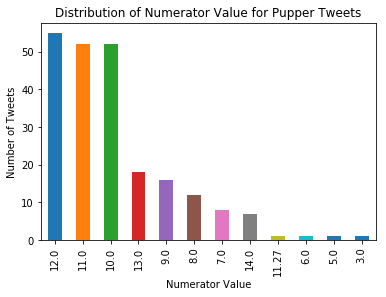

In [140]:
pupper['numerator1'].value_counts().plot(kind = 'bar')
plt.title("Distribution of Numerator Value for Pupper Tweets")
plt.xlabel("Numerator Value")
plt.ylabel("Number of Tweets")

Text(0,0.5,'Number of Tweets')

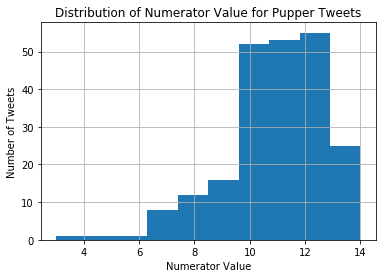

In [141]:
pupper['numerator1'].hist()
plt.title("Distribution of Numerator Value for Pupper Tweets")
plt.xlabel("Numerator Value")
plt.ylabel("Number of Tweets")

Text(0,0.5,'Number of Tweets')

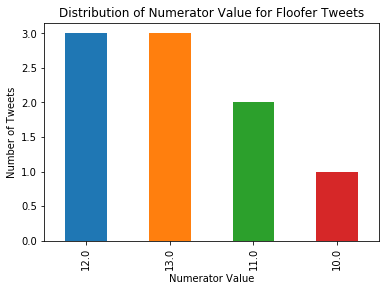

In [142]:
floofer['numerator1'].value_counts().plot(kind = 'bar')
plt.title("Distribution of Numerator Value for Floofer Tweets")
plt.xlabel("Numerator Value")
plt.ylabel("Number of Tweets")

Text(0,0.5,'Number of Tweets')

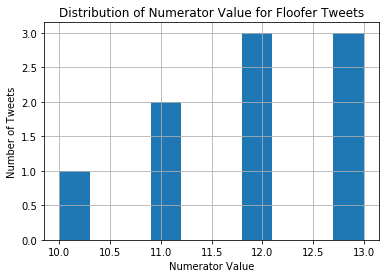

In [143]:
floofer['numerator1'].hist()
plt.title("Distribution of Numerator Value for Floofer Tweets")
plt.xlabel("Numerator Value")
plt.ylabel("Number of Tweets")

Text(0,0.5,'Number of Tweets')

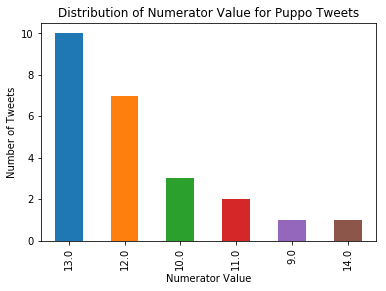

In [144]:
puppo['numerator1'].value_counts().plot(kind = 'bar')
plt.title("Distribution of Numerator Value for Puppo Tweets")
plt.xlabel("Numerator Value")
plt.ylabel("Number of Tweets")

Text(0,0.5,'Number of Tweets')

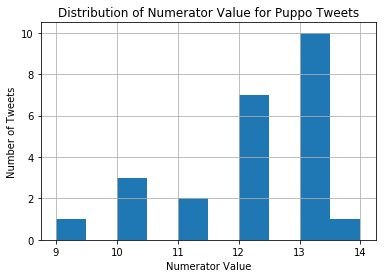

In [145]:
puppo['numerator1'].hist()
plt.title("Distribution of Numerator Value for Puppo Tweets")
plt.xlabel("Numerator Value")
plt.ylabel("Number of Tweets")

Text(0,0.5,'Number of Tweets')

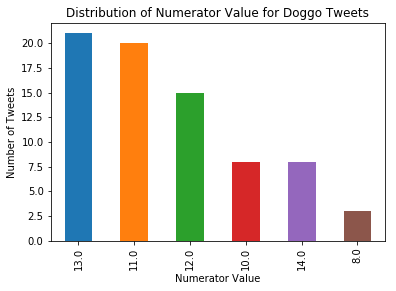

In [146]:
doggo['numerator1'].value_counts().plot(kind = 'bar')
plt.title("Distribution of Numerator Value for Doggo Tweets")
plt.xlabel("Numerator Value")
plt.ylabel("Number of Tweets")

Text(0,0.5,'Number of Tweets')

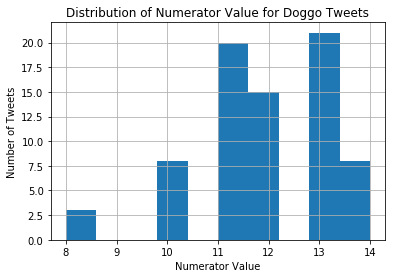

In [147]:
doggo['numerator1'].hist()
plt.title("Distribution of Numerator Value for Doggo Tweets")
plt.xlabel("Numerator Value")
plt.ylabel("Number of Tweets")

Text(0.5,0,'Numerator Value')

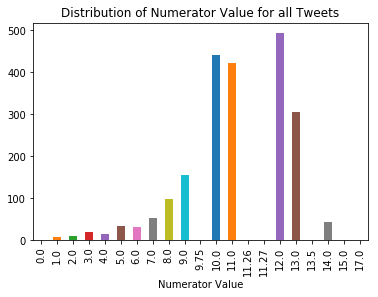

In [148]:
dog_analysis['numerator1'].value_counts().sort_index().plot(kind = 'bar')
plt.title("Distribution of Numerator Value for all Tweets")
plt.xlabel("Numerator Value")

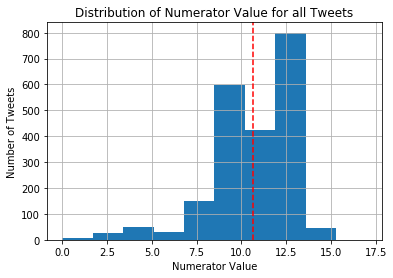

In [149]:
#Distribution of score for all tweets
dog_analysis['numerator1'].hist()
mean = dog_analysis['numerator1'].mean()
plt.title("Distribution of Numerator Value for all Tweets")
plt.xlabel("Numerator Value")
plt.ylabel("Number of Tweets")
plt.axvline(mean, ls = 'dashed',color = 'r')

### Proportion  of tweets belong to each dog stage

Text(0.5,1,'Number of tweets per dog stage')

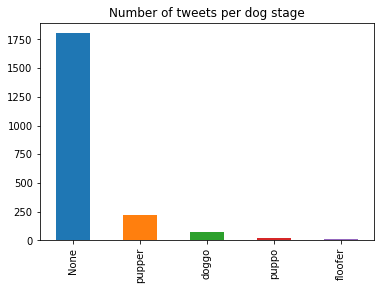

In [150]:
#Number of tweets of different dog types
dog_analysis.dog_stage.value_counts().plot(kind ='bar')
plt.title('Number of tweets per dog stage')

In [151]:
dog_analysis.groupby(['dog_stage']).size().apply(lambda x: (x/len(dog_analysis))*100)

dog_stage
None       84.449649
doggo      3.512881 
floofer    0.421546 
pupper     10.491803
puppo      1.124122 
dtype: float64

Text(0,0.5,'')

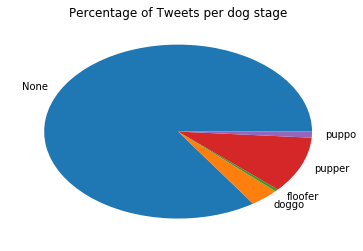

In [152]:
dog_analysis.groupby(['dog_stage']).size().apply(lambda x: (x/len(dog_analysis))*100).plot(kind = 'pie')
plt.title("Percentage of Tweets per dog stage")
plt.ylabel('')

### Is there a correlation between Number of Retweet Count and Rating

In [153]:
dog_analysis.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2135 entries, 0 to 2147
Data columns (total 14 columns):
tweet_id                 2135 non-null object
in_reply_to_status_id    2135 non-null object
in_reply_to_user_id      2135 non-null object
timestamp                2135 non-null datetime64[ns]
source                   2135 non-null object
text                     2135 non-null object
expanded_urls            2084 non-null object
rating_denominator       2135 non-null int64
name                     2135 non-null object
favorite_count           2134 non-null float64
retweet_count            2134 non-null float64
dog_stage                2135 non-null object
score_part               2135 non-null object
numerator1               2135 non-null float64
dtypes: datetime64[ns](1), float64(3), int64(1), object(9)
memory usage: 250.2+ KB


In [154]:
dog_analysis['numerator1'].corr(dog_analysis['retweet_count'])

0.28734573842712247

Text(0.5,1,'Retweet and Numerator Score Correlation')

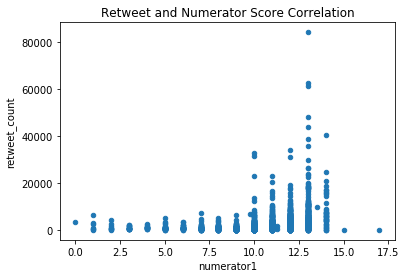

In [155]:
dog_analysis.plot(x='numerator1',y='retweet_count',kind='scatter')
plt.title("Retweet and Numerator Score Correlation")

**Conclusion**
There is a weak positive correlation.

### Is there a correlation between Number of Favorite Count and Rating


In [156]:
dog_analysis['numerator1'].corr(dog_analysis['favorite_count'])

0.3761055845497208

Text(0.5,1,'Favorite Count and Numerator Score Correlation')

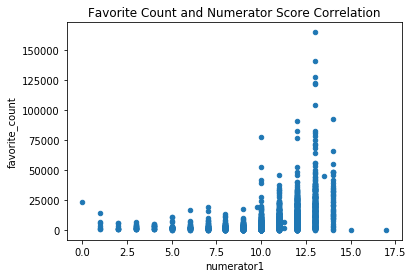

In [157]:
dog_analysis.plot(x='numerator1',y='favorite_count',kind='scatter')
plt.title("Favorite Count and Numerator Score Correlation")

**Conclusion**
There is a weak positive correlation.

### Is there a correlation between Number of Favorite Count and Retweet Count


In [158]:
dog_analysis['retweet_count'].corr(dog_analysis['favorite_count'])

0.9266977299667674

Text(0.5,1,'Retweet and Favorite Count Correlation')

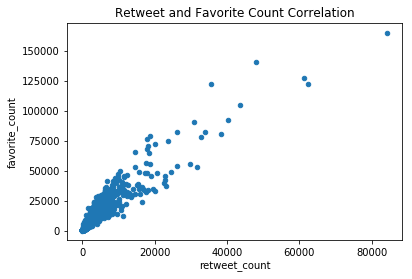

In [159]:
dog_analysis.plot(x='retweet_count',y='favorite_count',kind='scatter')
plt.title("Retweet and Favorite Count Correlation")

**Conclusion**
There is a strong positive correlation. Higher the retweet_count, higher is the favorite_count

In [160]:
dog_analysis.corr()

,rating_denominator,favorite_count,retweet_count,numerator1
rating_denominator,NaN,NaN,NaN,NaN
favorite_count,NaN,1.000000,0.926698,0.376106
retweet_count,NaN,0.926698,1.000000,0.287346
numerator1,NaN,0.376106,0.287346,1.000000


### Rating trend over time

In [689]:
import datetime as dt

In [751]:
#Creating a new data frame with only required columns
dog_rating = dog_analysis[['tweet_id','timestamp','numerator1','retweet_count','favorite_count']]

In [752]:
# Sorting the data based on time
dog_rating.sort_values(by='timestamp',inplace=True)

C:\Users\ajith_sharma\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [753]:
#Group by year and month to review the trent
Monthly_avg_score = dog_rating.numerator1.groupby([dog_rating["timestamp"].dt.year,dog_rating["timestamp"].dt.month]).mean()

In [754]:
Monthly_avg_score

timestamp  timestamp
2015       11           8.946309 
           12           9.606891 
2016       1            10.259259
           2            10.065041
           3            10.571429
           4            10.706897
           5            10.879310
           6            10.472527
           7            10.946237
           8            11.015873
           9            11.239265
           10           11.774306
           11           11.982143
           12           11.947368
2017       1            12.275362
           2            12.057143
           3            12.375000
           4            12.333333
           5            12.777778
           6            12.560000
           7            12.896226
           8            13.000000
Name: numerator1, dtype: float64

Text(0.5,0,'30 Day Rolling Time')

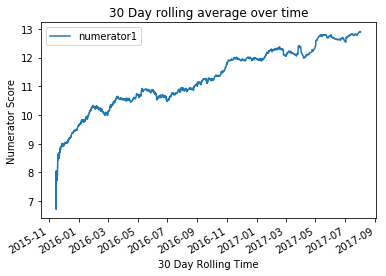

In [755]:
#Plot 30 day rolling average
dog_rating.rolling(window='30d',on='timestamp').mean().plot(x='timestamp',y='numerator1')
plt.title("30 Day rolling average over time")
plt.ylabel("Numerator Score")
plt.xlabel("30 Day Rolling Time")

Text(0.5,0,'Months')

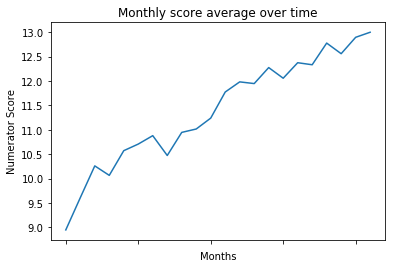

In [756]:
Monthly_avg_score.plot()
plt.title("Monthly score average over time")
plt.ylabel("Numerator Score")
plt.xlabel("Months")

** Conclusion **
The overall score that the dogs have received have gone higher over time.

### Number of Tweets over time

In [757]:
#Group data frame by month to check the average number of tweets per month
tweet_count = dog_rating.tweet_id.groupby([dog_rating["timestamp"].dt.year,dog_rating["timestamp"].dt.month]).count()

Text(0.5,0,'Months')

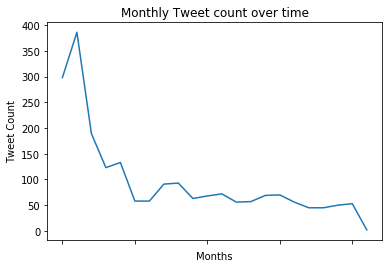

In [758]:
tweet_count.plot()
plt.title("Monthly Tweet count over time")
plt.ylabel("Tweet Count")
plt.xlabel("Months")

Text(0.5,0,'Months')

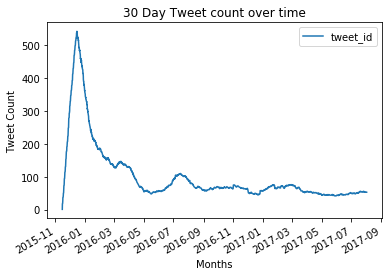

In [759]:
dog_rating.rolling(window='30d',on='timestamp').count().plot(x='timestamp',y='tweet_id')
plt.title("30 Day Tweet count over time")
plt.ylabel("Tweet Count")
plt.xlabel("Months")

** Conclusion **

The average number of new tweets per month have reduced over time.

### Retweet trend over time

In [760]:
retweet_count = dog_analysis.retweet_count.groupby([dog_rating["timestamp"].dt.year,dog_rating["timestamp"].dt.month]).mean()

In [761]:
retweet_count

timestamp  timestamp
2015       11           498.406040 
           12           1474.059585
2016       1            1458.470899
           2            1474.739837
           3            1663.293233
           4            1569.068966
           5            1885.086207
           6            3999.868132
           7            2724.847826
           8            3333.412698
           9            3429.720588
           10           4425.722222
           11           4370.535714
           12           5459.017544
2017       1            5816.333333
           2            3949.800000
           3            4426.857143
           4            4757.555556
           5            7180.155556
           6            6002.360000
           7            6586.000000
           8            7274.000000
Name: retweet_count, dtype: float64

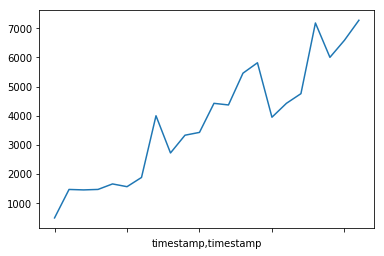

In [762]:
retweet_count.plot()

** Conclusion **

The average number of retweets per month have increased over time.

### Favorite Count trend over time

In [791]:
# Determine monthly average for Favorite Counts
favorite_count = dog_analysis.favorite_count.groupby([dog_rating["timestamp"].dt.year,dog_rating["timestamp"].dt.month]).mean()
favorite_count

timestamp  timestamp
2015       11           1163.855705 
           12           3482.217617 
2016       1            3817.089947 
           2            4022.382114 
           3            4474.939850 
           4            4580.603448 
           5            5374.344828 
           6            9655.263736 
           7            7340.065217 
           8            9645.365079 
           9            10718.191176
           10           13387.986111
           11           13457.446429
           12           16306.263158
2017       1            18242.217391
           2            17098.485714
           3            18897.000000
           4            20279.933333
           5            28203.866667
           6            27027.360000
           7            30774.283019
           8            35483.500000
Name: favorite_count, dtype: float64

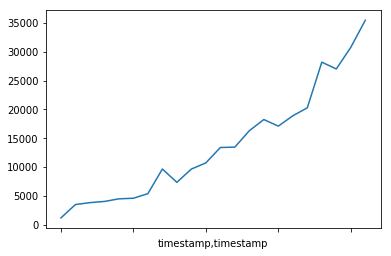

In [764]:
favorite_count.plot()

** Conclusion **

The average number of dogs being marked as 'Favorite' per month have increased over time.